# EE798 HW1

In [76]:
from scipy.linalg import toeplitz
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt 

## Q2.a

In [71]:
def linear_conv_mat(h:np.array,output_size):
    L = h.size
    h_ex = np.zeros(output_size)
    h_ex[0:L] = h
    first_row = np.roll(np.flip(h_ex),1)
    return toeplitz(h_ex.T,first_row[0:(output_size-L+1)]) # H + X - 1 = output_size

Demonstration 

In [72]:
h = np.array([1,2,3,4,5])
H = linear_conv_mat(h,8)
H


array([[1., 0., 0., 0.],
       [2., 1., 0., 0.],
       [3., 2., 1., 0.],
       [4., 3., 2., 1.],
       [5., 4., 3., 2.],
       [0., 5., 4., 3.],
       [0., 0., 5., 4.],
       [0., 0., 0., 5.]])

Verification 

In [182]:
x = np.random.randint(0,10,(8))
res = np.convolve(x,h)
H = linear_conv_mat(h,res.size)
res2 = np.matmul(H,x.T)
assert np.array_equal(res,res2)

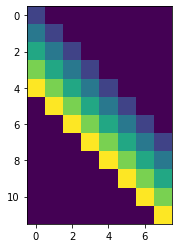

In [74]:
plt.imshow(H)

## Q2 b 

In [115]:
def cconv(x:np.array, y:np.array, N:int):
    return np.real(ifft(np.multiply(fft(x,N),fft(y,N))))


Verification

In [129]:
x = np.random.randint(0,5,(5))
y = np.random.randint(0,5,(4))
N = 8
res = cconv(x,y,N)
print("X = ",x,"\nY = ",y)
print("Linear convolution: ", np.convolve(x,y))
print("Circular convolution with N =", N, ":", res)
N = 6
res = cconv(x,y,N)
print("Circular convolution with N =", N, ":", np.round(res,2))


X =  [2 1 0 0 0] 
Y =  [4 3 1 4]
Linear convolution:  [ 8 10  5  9  4  0  0  0]
Circular convolution with N = 8 : [ 8.0000000e+00  1.0000000e+01  5.0000000e+00  9.0000000e+00
  4.0000000e+00 -8.8817842e-16  0.0000000e+00 -8.8817842e-16]
Circular convolution with N = 6 : [ 8. 10.  5.  9.  4.  0.]


## Q2 c

In [175]:
def  cconvmtx(h:np.array, N:int):
    I = np.eye(N)
    for i in range(N):
        I[:,i] = np.round(cconv(h,I[:,i].T,N).T,3)
    return I

In [181]:
h = np.random.randint(0,5,32)
N = 28
x = np.random.randint(0,5,N)
res = cconv(x,h,N)
H = cconvmtx(h,N)
res2 = np.matmul(H,x)
assert np.sum(np.isclose(res,res2)) == res.size # np.array_equal may output False due to precision errors


## Q2 d